In [6]:

import pandas as pd

In [2]:
rawData = open("SMSSpamCollection.tsv").read()
rawData[0:500]

"ham\tI've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.\nspam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\nham\tNah I don't think he goes to usf, he lives around here though\nham\tEven my brother is not like to speak with me. They treat me like aid"

In [4]:
parsedData=rawData.replace('\t','\n').split('\n')  
parsedData[0:5]

['ham',
 "I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.",
 'spam',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'ham']

In [5]:
#now we divide it into labels and texts
labelData= parsedData[0::2]
textData= parsedData[1::2]
print(labelData[0:5]) 
print(textData[0:5])

['ham', 'spam', 'ham', 'ham', 'ham']
["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.", "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's", "Nah I don't think he goes to usf, he lives around here though", 'Even my brother is not like to speak with me. They treat me like aids patent.', 'I HAVE A DATE ON SUNDAY WITH WILL!!']


In [7]:
len(labelData)  

5571

In [8]:
len(textData)

5570

In [9]:
print(labelData[-5:]) #last 5

['ham', 'ham', 'ham', 'ham', '']


In [10]:
fullCorpus = pd.DataFrame({'Label':labelData[:-1], 'Text':textData})
fullCorpus.head()

,Label,Text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [12]:
#Using Pandas
dataset=pd.read_csv('SMSSpamCollection.tsv',sep='\t',header=None)
dataset.columns=['Label','Text']
dataset.head()

,Label,Text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


### Exploring dataset

In [17]:
#what is the shape?
print("rows {} and col {}".format(len(fullCorpus),len(fullCorpus.columns)))

rows 5570 and col 2


In [22]:
#how many Spam/Ham ?
print(len(fullCorpus[fullCorpus["Label"]=="spam"]))
print(len(fullCorpus[fullCorpus["Label"]=="ham"]))

746
4824


In [24]:
#how much missing data
print(fullCorpus['Label'].isnull().sum())
print(fullCorpus['Text'].isnull().sum())

0
0


### Regular expressions (RegEx)

In [25]:
import re

In [26]:
re_test = 'This is a made up string to test 2 different regex methods'
re_test_messy= 'This     is a   made    up string to        test 2 different   regex  methods'
re_test_messy2= 'This-is-a-made-up\string**to>>>test----2\different.regex=methods'

In [27]:
re.split('\s',re_test) #split helps us to tokenize by searching for the regex

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex',
 'methods']

In [28]:
re.split('\s',re_test_messy)

['This',
 '',
 '',
 '',
 '',
 'is',
 'a',
 '',
 '',
 'made',
 '',
 '',
 '',
 'up',
 'string',
 'to',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'test',
 '2',
 'different',
 '',
 '',
 'regex',
 '',
 'methods']

In [29]:
re.split('\s+',re_test_messy)  #  tokenize by splitting more than one whitespace

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex',
 'methods']

In [30]:
re.split('\W+',re_test_messy2) # tokenize by splitting  non word charactrs

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex',
 'methods']

In [32]:
re.findall('\S+',re_test) # search for all NON-whitespace charc.

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex',
 'methods']

In [34]:
re.findall('\S+',re_test_messy)

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex',
 'methods']

In [35]:
re.findall('\w+',re_test_messy2)

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex',
 'methods']

In [36]:
pep8_test ='I try to follow PEP8 guidelines'
pep7_test ='I try to follow PEP7 guidelines'
peep8_test ='I try to follow PEEP8 guidelines'


In [37]:
re.findall('[a-z]+', pep8_test) # finds words with smallcase alphabets

['try', 'to', 'follow', 'guidelines']

In [38]:
re.findall('[A-Z]+', pep8_test)

['I', 'PEP']

In [39]:
re.findall('[A-Z]+[0-9]+', pep8_test)

['PEP8']

In [40]:
re.sub('[A-Z]+[0-9]+','PEP8 Python style', pep8_test)  #substitutes Pep8 

'I try to follow PEP8 Python style guidelines'

## Preprocessing (Cleaning)
### Removing Punctuations

In [41]:
dataset.head()

,Label,Text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [42]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [46]:
def rem_punct(text):
    text_nopunct="".join([char for char in text if char not in string.punctuation])
    return text_nopunct
dataset['Text_clean']= dataset['Text'].apply(lambda x: rem_punct(x))
dataset.head()

,Label,Text,Text_clean
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL


### Tokeniztion

In [47]:
import re

In [49]:
def tokenize(text):
    tokens= re.split('\W+',text)
    return tokens
dataset['Text_tokenizd']=dataset['Text_clean'].apply(lambda x: tokenize(x.lower()))
dataset.head()

,Label,Text,Text_clean,Text_tokenizd
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l..."
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]"


### Remove stopwords

In [53]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jasna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [54]:
stopword=nltk.corpus.stopwords.words('english')   #remove words like i, am, the,a, etc.

In [55]:
def rem_stopwords(tokenized_text):
    text=[word for word in tokenized_text if word not in stopword]
    return text
dataset['Text_nostop']=dataset['Text_tokenizd'].apply(lambda x: rem_stopwords(x))
dataset.head()

,Label,Text,Text_clean,Text_tokenizd,Text_nostop
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,...","[ive, searching, right, words, thank, breather..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t..."
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]"


## Supplemental data cleaning

In [58]:
#stemming
ps=nltk.PorterStemmer()
print(ps.stem('grows'))
print(ps.stem('grow'))
print(ps.stem('growing'))

grow
grow
grow


In [59]:
def stemming(tokenized_text):
    text=[ps.stem(word) for word in tokenized_text ]
    return text
dataset['Stemmed_Text']=dataset['Text_nostop'].apply(lambda x: stemming(x))
dataset.head()

,Label,Text,Text_clean,Text_tokenizd,Text_nostop,Stemmed_Text
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,...","[ive, searching, right, words, thank, breather...","[ive, search, right, word, thank, breather, pr..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho..."
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids...","[even, brother, like, speak, treat, like, aid,..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]"


In [64]:
#Lemmatizing
wn=nltk.WordNetLemmatizer()
print(wn.lemmatize('meanness'))
print(wn.lemmatize('meaning'))

meanness
meaning


In [65]:
def lemmatizing(tokenized_text):
    text=[wn.lemmatize(word) for word in tokenized_text ]
    return text
dataset['Lemmatized_Text']=dataset['Text_nostop'].apply(lambda x: lemmatizing(x))
dataset.head()

,Label,Text,Text_clean,Text_tokenizd,Text_nostop,Stemmed_Text,Lemmatized_Text
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,...","[ive, searching, right, words, thank, breather...","[ive, search, right, word, thank, breather, pr...","[ive, searching, right, word, thank, breather,..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho...","[nah, dont, think, go, usf, life, around, though]"
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids...","[even, brother, like, speak, treat, like, aid,...","[even, brother, like, speak, treat, like, aid,..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]","[date, sunday]"


## Vectorizing

In [73]:
pd.set_option('display.max_colwidth',100)
stopwords=nltk.corpus.stopwords.words('english')
data=pd.read_csv('SMSSpamCollection.tsv',sep='\t')
data.columns=['Label','Text']

In [82]:
def clean_text(text):
    text="".join([word.lower() for word in text if text not in string.punctuation])
    tokens=re.split('\W+',text)
    text=[ps.stem(word) for word in tokens if text not in stopwords]
    return text        #remove puntuation,tokenize,stopword and stem

dataset['Clean_Text']=dataset['Text'].apply(lambda x: clean_text(x))
dataset.head()

,Label,Text,Text_clean,Text_tokenizd,Text_nostop,Stemmed_Text,Lemmatized_Text,Clean_Text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, ...","[ive, searching, right, words, thank, breather, promise, wont, take, help, granted, fulfil, prom...","[ive, search, right, word, thank, breather, promis, wont, take, help, grant, fulfil, promis, won...","[ive, searching, right, word, thank, breather, promise, wont, take, help, granted, fulfil, promi...","[i, ve, been, search, for, the, right, word, to, thank, you, for, thi, breather, i, promis, i, w..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entri, in, 2, a, wkli, comp, to, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, to,..."
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]","[nah, dont, think, go, usf, life, around, though]","[nah, i, don, t, think, he, goe, to, usf, he, live, around, here, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]","[even, brother, like, speak, treat, like, aids, patent]","[even, brother, like, speak, treat, like, aid, patent]","[even, brother, like, speak, treat, like, aid, patent]","[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aid, patent, ]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]","[date, sunday]","[i, have, a, date, on, sunday, with, will, ]"


### Count vectorization

In [76]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect= CountVectorizer(analyzer=clean_text)
x_counts=count_vect.fit_transform(data['Text'])
print(x_counts.shape)
print(count_vect.get_feature_names())

(5567, 7388)
['', '0', '00', '000', '000pe', '008704050406', '0089', '0121', '01223585236', '01223585334', '0125698789', '02', '0207', '02072069400', '02073162414', '02085076972', '021', '03', '04', '0430', '05', '050703', '0578', '06', '07', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07781482378', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '078498', '07880867867', '0789xxxxxxx', '07946746291', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '08', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '083', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18', '0870',

In [77]:
data_samp=data[0:20]
count_vect_samp=CountVectorizer(analyzer=clean_text)
x_counts_samp=count_vect_samp.fit_transform(data_samp['Text'])
print(x_counts_samp.shape) # 20 rows and 249 unique words(colms)
print(count_vect_samp.get_feature_names())

(20, 249)
['', '000', '08002986030', '08452810075over18', '09061701461', '1', '100', '11', '12', '150p', '16', '2', '20', '2005', '21st', '3', '4', '4403ldnw1a7rw18', '4txt', '6day', '81010', '87077', '87121', '87575', '9', '900', 'a', 'about', 'aft', 'aid', 'all', 'alreadi', 'alright', 'and', 'anymor', 'appli', 'ard', 'around', 'as', 'b', 'be', 'been', 'brother', 'c', 'call', 'caller', 'callertun', 'camera', 'can', 'cash', 'chanc', 'claim', 'click', 'co', 'code', 'colour', 'com', 'comin', 'comp', 'copi', 'cost', 'credit', 'cri', 'csh11', 'cup', 'custom', 'da', 'date', 'day', 'dbuk', 'did', 'don', 'dont', 'down', 'eg', 'eh', 'england', 'enough', 'entitl', 'entri', 'even', 'fa', 'feel', 'ffffffffff', 'final', 'fine', 'finish', 'first', 'for', 'free', 'friend', 'from', 'go', 'goal', 'goe', 'gonna', 'gota', 'ha', 'had', 'have', 'he', 'here', 'hi', 'hl', 'home', 'hour', 'how', 'http', 'i', 'if', 'in', 'info', 'is', 'it', 'jackpot', 'joke', 'k', 'kl341', 'lar', 'latest', 'lccltd', 'like', '

In [80]:
x_counts_df =pd.DataFrame(x_counts_samp.toarray())
x_counts_df   #sparse matrix

,0,1,2,3,4,5,6,7,8,9,...,239,240,241,242,243,244,245,246,247,248
0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0
5,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
6,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,1,1,0,0,0,...,0,1,1,1,0,0,1,0,0,0


In [81]:
x_counts_df.columns= count_vect_samp.get_feature_names()   #with column names
x_counts_df

,,000,08002986030,08452810075over18,09061701461,1,100,11,12,150p,...,wkli,won,word,www,xxxmobilemovieclub,ye,you,your,ú1,ü
0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0
5,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
6,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,1,1,0,0,0,...,0,1,1,1,0,0,1,0,0,0


### N- gram vectorization 
#### instead of one token per col, bigram, trigram, etc. are used to store 2 or 3 etc. tokens

In [84]:
def clean_text(text):
    text="".join([word.lower() for word in text if text not in string.punctuation])
    tokens=re.split('\W+',text)
    text=" ".join([ps.stem(word) for word in tokens if text not in stopwords])
    return text        #remove puntuation,tokenize,stopword and stem

dataset['Clean_Text']=dataset['Text'].apply(lambda x: clean_text(x))
dataset.head()

,Label,Text,Text_clean,Text_tokenizd,Text_nostop,Stemmed_Text,Lemmatized_Text,Clean_Text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, ...","[ive, searching, right, words, thank, breather, promise, wont, take, help, granted, fulfil, prom...","[ive, search, right, word, thank, breather, promis, wont, take, help, grant, fulfil, promis, won...","[ive, searching, right, word, thank, breather, promise, wont, take, help, granted, fulfil, promi...",i ve been search for the right word to thank you for thi breather i promis i wont take your help...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...",free entri in 2 a wkli comp to win fa cup final tkt 21st may 2005 text fa to 87121 to receiv ent...
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]","[nah, dont, think, go, usf, life, around, though]",nah i don t think he goe to usf he live around here though
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]","[even, brother, like, speak, treat, like, aids, patent]","[even, brother, like, speak, treat, like, aid, patent]","[even, brother, like, speak, treat, like, aid, patent]",even my brother is not like to speak with me they treat me like aid patent
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]","[date, sunday]",i have a date on sunday with will


In [89]:
from sklearn.feature_extraction.text import CountVectorizer
ngram_vect= CountVectorizer(ngram_range=(2,2))   # bigram
x_counts=ngram_vect.fit_transform(dataset['Clean_Text'])
print(x_counts.shape)
print(ngram_vect.get_feature_names())  
#two word combinations (bigrams) so 40318 columns here

(5568, 40318)
['00 in', '00 per', '00 sub', '000 bonu', '000 cash', '000 homeown', '000 pound', '000 price', '000 prize', '000 xma', '000pe so', '008704050406 sp', '0089 my', '0121 2025050', '01223585236 xx', '01223585334 to', '0125698789 ring', '02 06', '02 09', '02 claimcod', '02 user', '0207 083', '0207 153', '02072069400 bx', '02073162414 now', '02085076972 repli', '021 3680', '03 05', '03 is', '03 our', '03 thi', '04 call', '0430 jul', '05 05', '05 or', '050703 csbcm4235wc1n3xx', '0578 now', '06 03', '06 05', '06 11', '06 good', '07 11', '07046744435 now', '07090298926 to', '07099833605 to', '07123456789 to', '0721072 to', '07732584351 rodger', '07734396839 ibh', '07742676969 show', '07753741225 show', '0776xxxxxxx ve', '07781482378 com', '077xxx won', '07801543489 are', '07808 xxxxxx', '07808247860 show', '07808726822 wa', '07815296484 show', '078498 show', '0789xxxxxxx today', '07946746291 07880867867', '0796xxxxxx today', '07973788240 show', '07xxxxxxxxx show', '07xxxxxxxxx won

In [93]:
data_samp=dataset[0:20]
ngram_vect_samp= CountVectorizer(ngram_range=(2,2))   # bigram
x_ng_samp=ngram_vect_samp.fit_transform(data_samp['Clean_Text'])
print(x_ng_samp.shape)
print(ngram_vect_samp.get_feature_names())

(20, 332)
['000 pound', '000 prize', '09061701461 claim', '100 000', '100 to', '11 month', '12 hour', '150p day', '16 tsandc', '20 000', '20 poboxox36504w45wq', '2005 text', '21st may', '4txt ú1', '6day 16', '81010 www', '87077 eg', '87077 tri', '87121 to', '87575 cost', '900 prize', 'about thi', 'aft finish', 'aid patent', 'all caller', 'all time', 'and bless', 'and don', 'and send', 'and will', 'anymor tonight', 'appli 08452810075over18', 'appli repli', 'ard smth', 'around here', 'as per', 'as valu', 'as your', 'at all', 'be home', 'been search', 'been select', 'been set', 'been wonder', 'bless at', 'breather promis', 'brother is', 'call 09061701461', 'call the', 'caller press', 'callertun for', 'camera for', 'cash from', 'chanc to', 'claim call', 'claim code', 'claim to', 'click here', 'click the', 'co free', 'code kl341', 'colour mobil', 'com qjkgighjjgcbl', 'comp to', 'copi your', 'cost 150p', 'credit click', 'cri enough', 'csh11 and', 'cup final', 'custom you', 'da stock', 'date 

In [95]:
x_ng_df =pd.DataFrame(x_ng_samp.toarray())

x_ng_df.columns= ngram_vect_samp.get_feature_names()   #with column names
x_ng_df

,000 pound,000 prize,09061701461 claim,100 000,100 to,11 month,12 hour,150p day,16 tsandc,20 000,...,you for,you have,you spell,your callertun,your credit,your friend,your help,your mobil,your request,ú1 20
0,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
6,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


### TF-IDF : the rarer the word, the higher the value 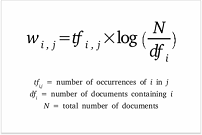

In [96]:
def clean_text(text):
    text="".join([word.lower() for word in text if text not in string.punctuation])
    tokens=re.split('\W+',text)
    text=[ps.stem(word) for word in tokens if text not in stopwords]
    return text        #remove puntuation,tokenize,stopword and stem

In [101]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect= TfidfVectorizer(analyzer= clean_text) 
x_tfidf=tfidf_vect.fit_transform(dataset['Clean_Text'])
print(x_tfidf.shape)
print(ngram_vect.get_feature_names())  

(5568, 7365)
['00 in', '00 per', '00 sub', '000 bonu', '000 cash', '000 homeown', '000 pound', '000 price', '000 prize', '000 xma', '000pe so', '008704050406 sp', '0089 my', '0121 2025050', '01223585236 xx', '01223585334 to', '0125698789 ring', '02 06', '02 09', '02 claimcod', '02 user', '0207 083', '0207 153', '02072069400 bx', '02073162414 now', '02085076972 repli', '021 3680', '03 05', '03 is', '03 our', '03 thi', '04 call', '0430 jul', '05 05', '05 or', '050703 csbcm4235wc1n3xx', '0578 now', '06 03', '06 05', '06 11', '06 good', '07 11', '07046744435 now', '07090298926 to', '07099833605 to', '07123456789 to', '0721072 to', '07732584351 rodger', '07734396839 ibh', '07742676969 show', '07753741225 show', '0776xxxxxxx ve', '07781482378 com', '077xxx won', '07801543489 are', '07808 xxxxxx', '07808247860 show', '07808726822 wa', '07815296484 show', '078498 show', '0789xxxxxxx today', '07946746291 07880867867', '0796xxxxxx today', '07973788240 show', '07xxxxxxxxx show', '07xxxxxxxxx won'

In [104]:
data_samp=dataset[0:20]
tfidf_vect_samp= TfidfVectorizer(analyzer=clean_text)   # bigram
x_tfidf_samp=tfidf_vect_samp.fit_transform(data_samp['Clean_Text'])
print(x_tfidf_samp.shape)
print(tfidf_vect_samp.get_feature_names())

(20, 257)
['', '000', '08002986030', '08452810075over18', '09061701461', '1', '100', '11', '12', '150p', '16', '2', '20', '2005', '21st', '3', '4', '4403ldnw1a7rw18', '4txt', '6day', '81010', '87077', '87121', '87575', '9', '900', 'a', 'about', 'aft', 'aid', 'all', 'alreadi', 'and', 'anymor', 'appli', 'ard', 'around', 'as', 'at', 'b', 'be', 'been', 'bless', 'breather', 'brother', 'c', 'call', 'caller', 'callertun', 'camera', 'cash', 'chanc', 'claim', 'click', 'co', 'code', 'colour', 'com', 'comin', 'comp', 'copi', 'cost', 'credit', 'cri', 'csh11', 'cup', 'custom', 'da', 'date', 'day', 'dbuk', 'did', 'don', 'dont', 'down', 'eg', 'eh', 'england', 'enough', 'entitl', 'entri', 'even', 'fa', 'feel', 'final', 'fine', 'finish', 'first', 'for', 'free', 'friend', 'from', 'fulfil', 'go', 'goal', 'goe', 'gonna', 'gota', 'grant', 'ha', 'had', 'have', 'he', 'help', 'here', 'hi', 'hl', 'home', 'hour', 'how', 'http', 'i', 'if', 'in', 'info', 'is', 'it', 'jackpot', 'joke', 'k', 'kl341', 'lar', 'latest

In [105]:
tfidf_df =pd.DataFrame(x_tfidf_samp.toarray())

tfidf_df.columns= tfidf_vect_samp.get_feature_names()   #with column names
tfidf_df   #shows weights(or importance) of each token

,,000,08002986030,08452810075over18,09061701461,1,100,11,12,150p,...,wonder,wont,word,www,xxxmobilemovieclub,ye,you,your,ú1,ü
0,0.075083,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.161342,0.161342,0.141822,0.000000,0.000000,0.000000,0.234460,0.117230,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.173264,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.108845,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.195356,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.393277,0.000000,0.000000
6,0.096537,0.000000,0.000000,0.000000,0.207443,0.000000,0.000000,0.000000,0.207443,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.150726,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.173835,0.000000,0.000000,0.000000,0.000000,0.173835,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.126307,0.000000,0.000000
8,0.101542,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.178318,0.000000,0.000000,0.000000,0.000000,0.178318,0.000000,0.000000,0.202861,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Feature Engineering

In [117]:
import pandas as pd
data= pd.read_csv("SMSSpamCollection.tsv", sep="\t")
data.columns=["Label","Text"]

In [118]:
data['text_len']=data['Text'].apply(lambda x: len(x) - x.count(" "))       
data.head()

,Label,Text,text_len
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128
1,ham,"Nah I don't think he goes to usf, he lives around here though",49
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,62
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,135


In [131]:
# FEATURE creation

def count_pun(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text)-text.count(" ")),3)*100
data["pun%"]=data["Text"].apply(lambda x: count_pun(x))

data.head()

,Label,Text,text_len,pun%
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128,4.7
1,ham,"Nah I don't think he goes to usf, he lives around here though",49,4.1
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,62,3.2
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,135,4.4


In [133]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

C:\Users\Jasna\anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
C:\Users\Jasna\anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


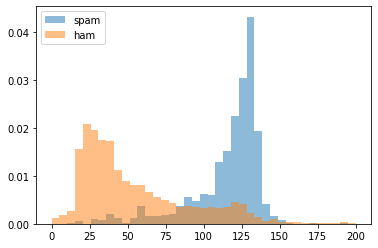

In [137]:
# FEATURE evaluation
# comparing text length for spam and ham


bins=np.linspace(0,200,40)
plt.hist(data[data["Label"]=="spam"]["text_len"],bins,alpha=0.5,normed=True,label="spam")
plt.hist(data[data["Label"]=="ham"]["text_len"],bins,alpha=0.5,normed=True,label="ham")
plt.legend(loc="upper left")
plt.show()

C:\Users\Jasna\anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Jasna\anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


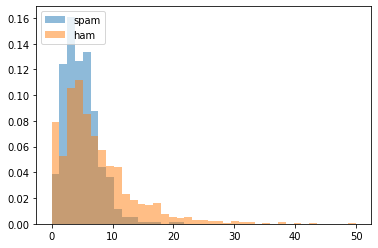

In [138]:
#Comparing % of puncttuation


bins=np.linspace(0,50,40)
plt.hist(data[data["Label"]=="spam"]["pun%"],bins,alpha=0.5,normed=True,label="spam")
plt.hist(data[data["Label"]=="ham"]["pun%"],bins,alpha=0.5,normed=True,label="ham")
plt.legend(loc="upper left")
plt.show()

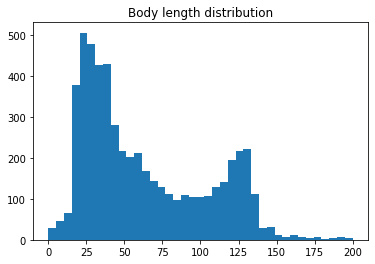

In [139]:
bins=np.linspace(0,200,40)
plt.hist(data["text_len"],bins)
plt.title("Body length distribution")
plt.show()

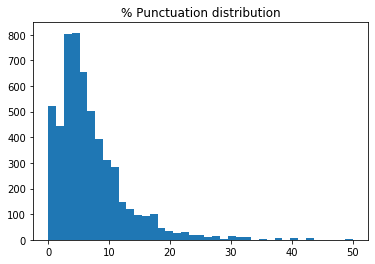

In [140]:
bins=np.linspace(0,50,40)
plt.hist(data["pun%"],bins)
plt.title("% Punctuation distribution")
plt.show()                      # this feature seem good for transformation

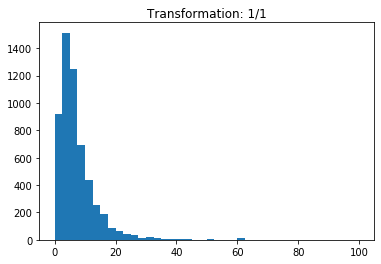

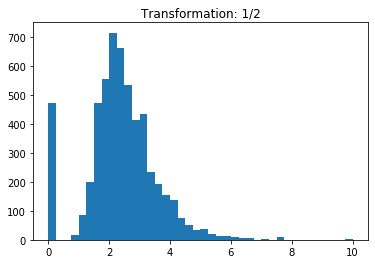

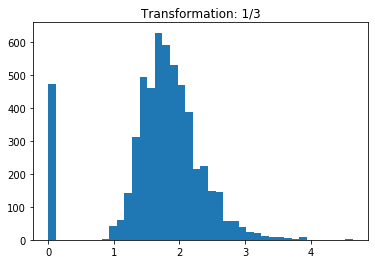

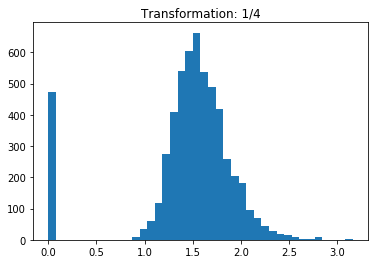

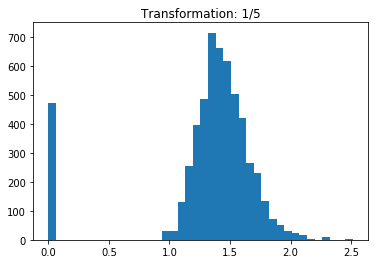

In [141]:
# FEATURE Transformation with Box-Cox transformation

for i in [1,2,3,4,5]:
    plt.hist((data["pun%"])**(1/i),bins=40)
    plt.title("Transformation: 1/{}".format(str(i)))
    plt.show()